In [1]:
#importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#importing dataset
df_loan_data_raw = pd.read_csv("loan_data.csv")

In [3]:
df_loan_data_raw.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Task1: Feature Transformation

#### Transform categorical values into numerical values (discrete)

In [4]:
df_loan_data_raw.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [5]:
df_loan_data_raw['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

# Task 1: Feature Transformation
## Tranforming Categorical value into numeric values
### purpose(object) to purpose(int32)

In [6]:
labEnc = LabelEncoder()
df_numeric = df_loan_data_raw
df_numeric["purpose"] = labEnc.fit_transform(df_loan_data_raw["purpose"])

In [7]:
df_numeric.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df_numeric.dtypes

credit.policy          int64
purpose                int32
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

# Task 2: Exploratory data Analysis

In [9]:
#checking for null values
df_numeric.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [10]:
#checking duplicate values
df_numeric.duplicated().sum()

0

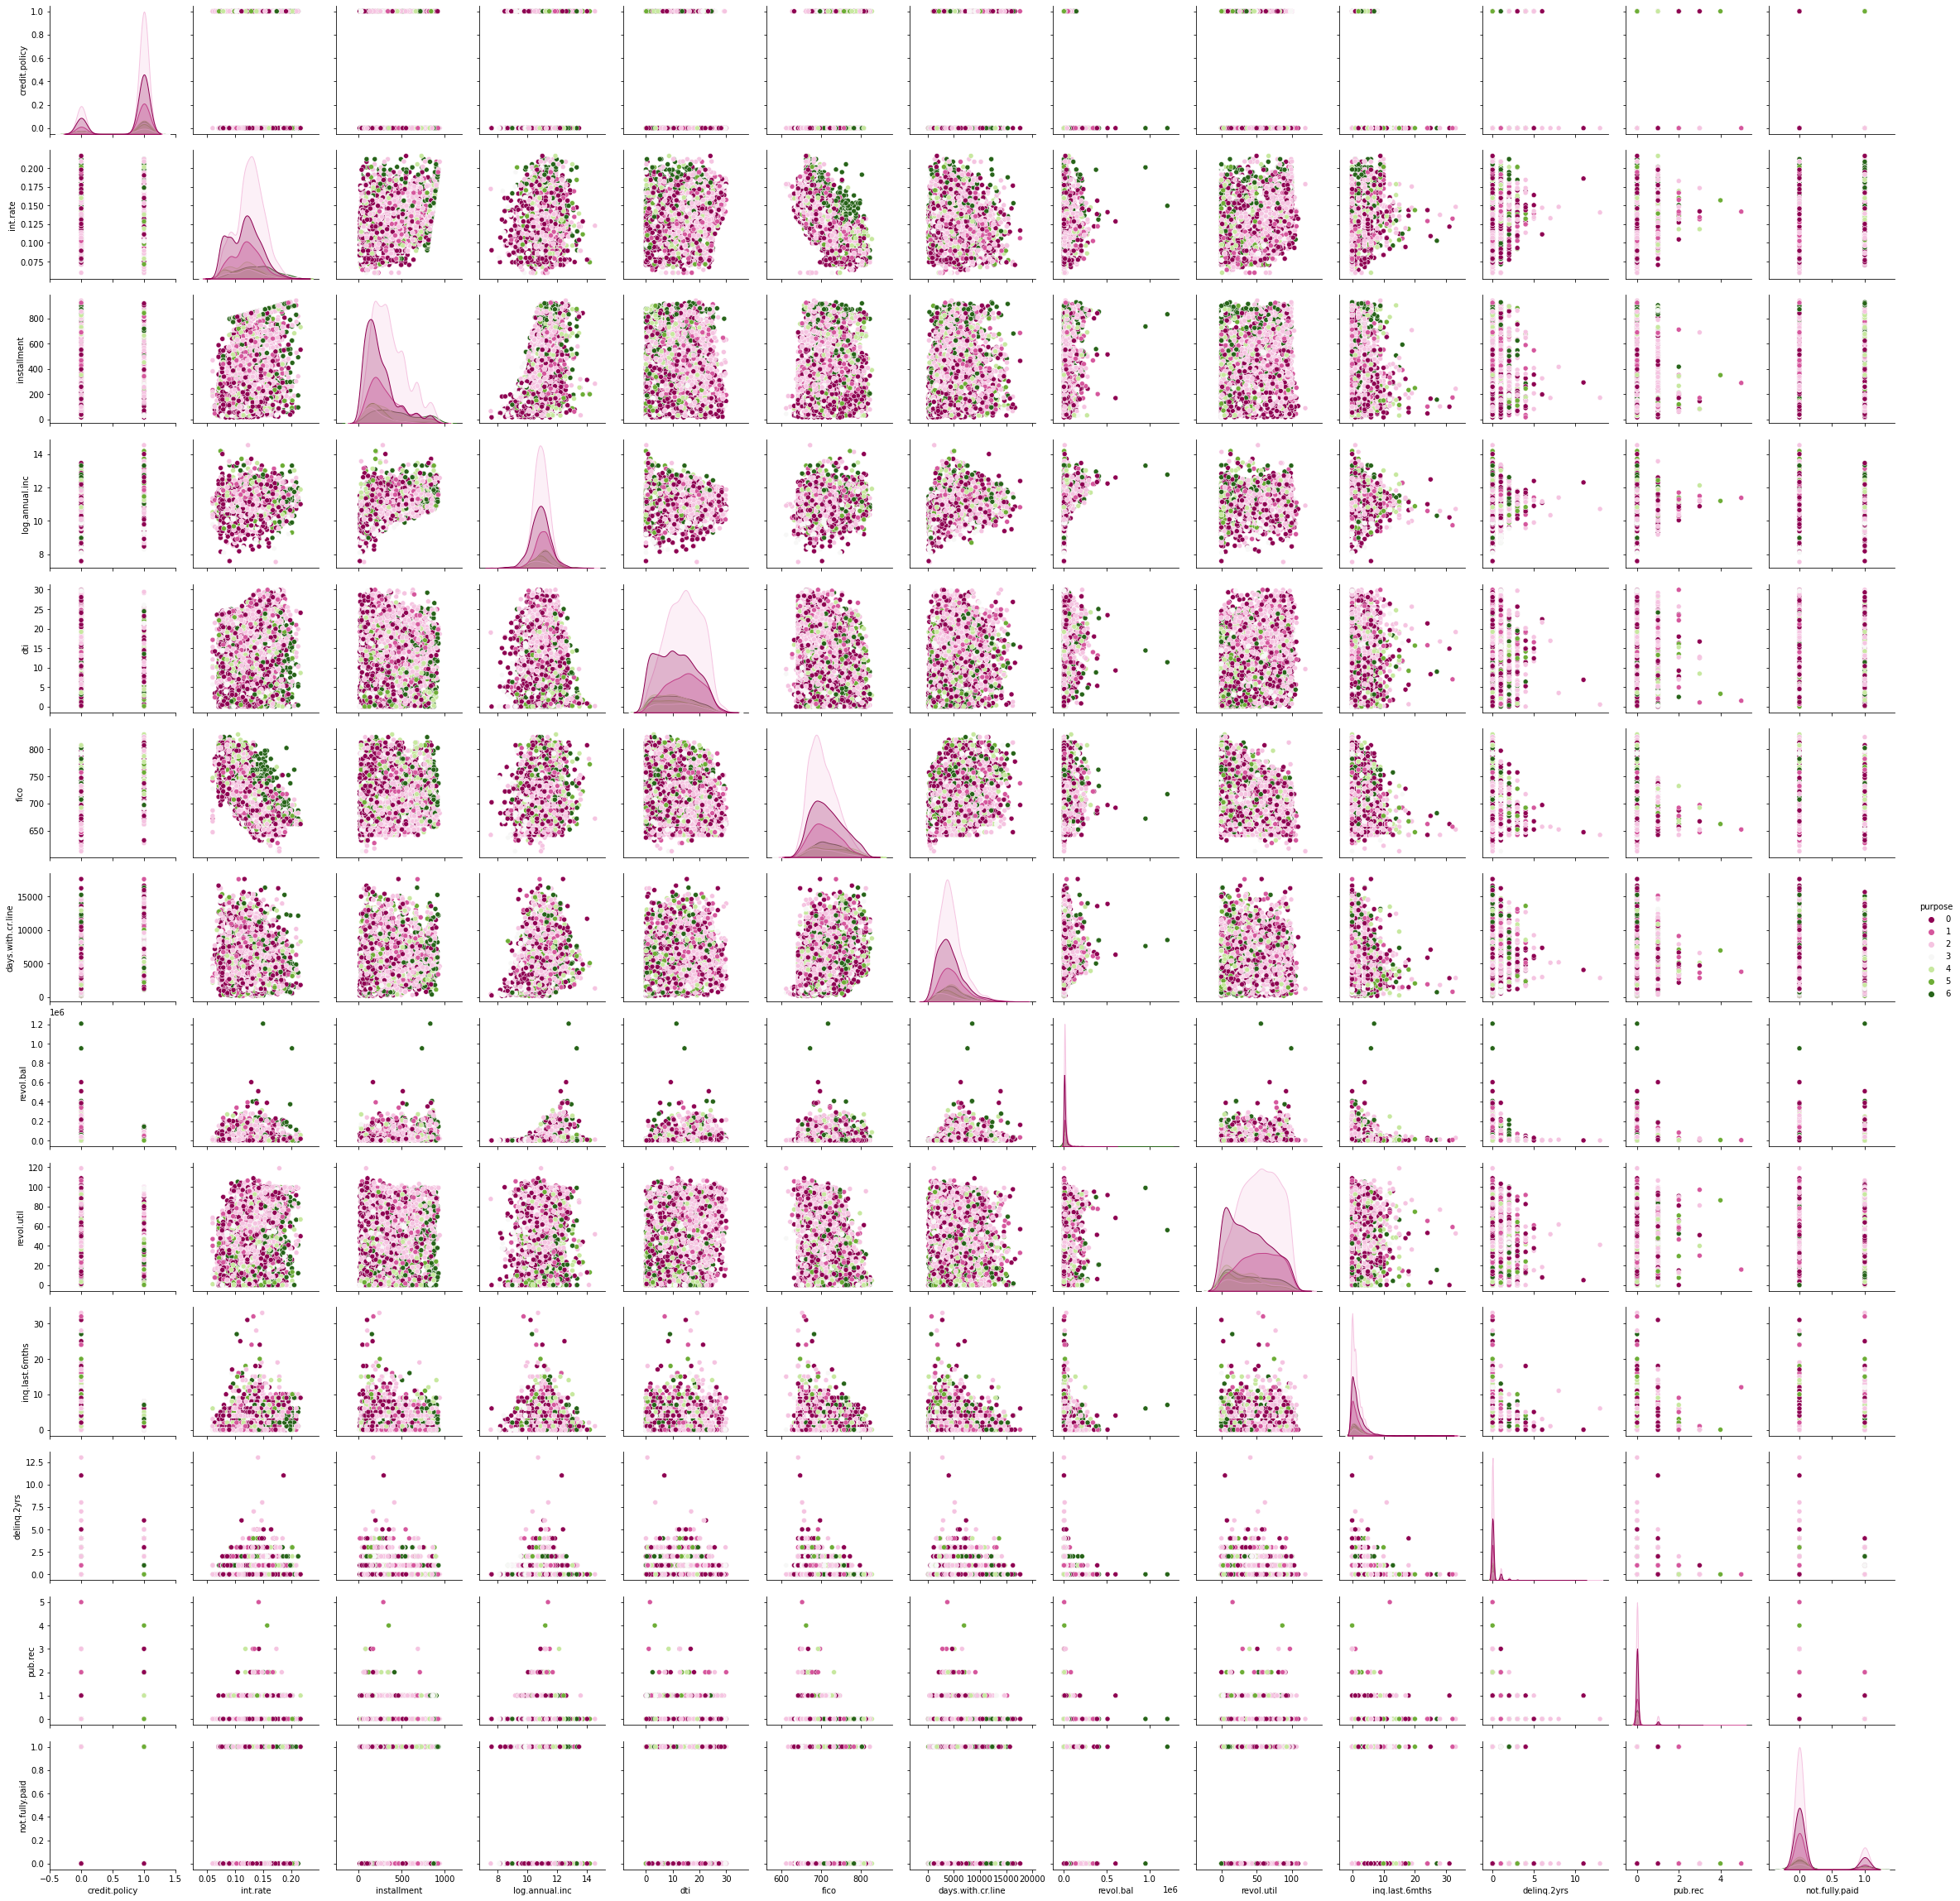

In [11]:
sns.pairplot(df_numeric, hue="purpose", palette="PiYG")

# Task 3: Additional Feature Engineering

### Checking the correlation between features and will drop those features which have a strong correlation

<AxesSubplot:>

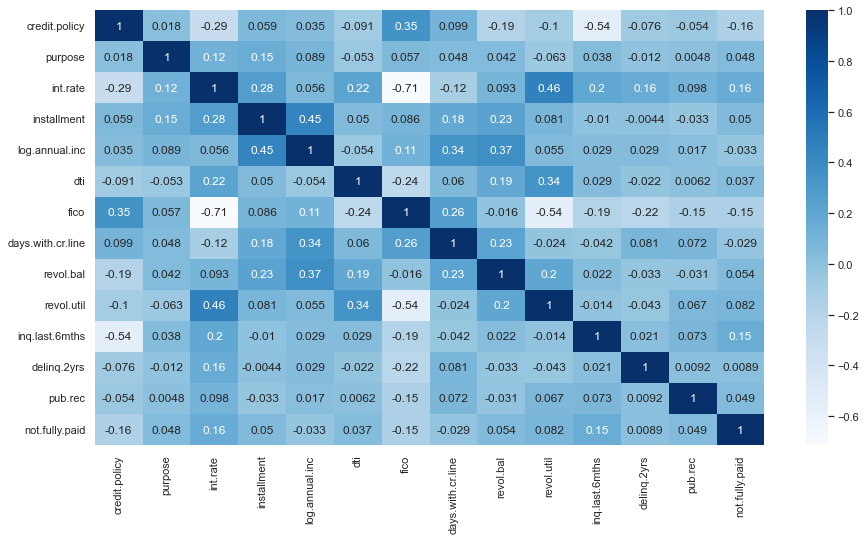

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_numeric.corr(), annot = True, fmt= '.2g', cmap= 'Blues')

In [13]:
cor_matrix = df_numeric.corr()
cor_matrix

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,0.017569,1.000000,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907
int.rate,-0.294089,0.117067,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.154827,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.088958,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.053279,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.057337,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,0.047526,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.042364,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.062947,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


In [14]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

C:\Users\shubh\AppData\Local\Temp\ipykernel_38904\918335127.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,NaN,0.017569,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,NaN,NaN,0.117067,0.154827,0.088958,-0.053279,0.057337,0.047526,0.042364,-0.062947,0.037516,-0.011701,0.004793,0.047907
int.rate,NaN,NaN,NaN,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,NaN,NaN,NaN,NaN,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,NaN,NaN,NaN,NaN,NaN,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,NaN,NaN,NaN,NaN,NaN,NaN,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013880,-0.042740,0.066717,0.082088


In [15]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
to_drop

[]

As we can see above there is nothing to drop as there is no feature with higher correlation

### Checking The biaseness in data 

In [16]:
#check weather the data is biasd or not
df_numeric["credit.policy"].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

# Task 4: Creating Model and applying addition Feature Engineering

## Modeling using tensorflow and keras

In [17]:
def ANN(X_train, X_test, y_train, y_test, loss, weights):
    model = keras.Sequential()
    
    model.add(keras.layers.Dense(units=39, input_dim = 13, activation = "relu"))
    model.add(keras.layers.Dense(units=39, activation = "relu"))
    model.add(keras.layers.Dense(units=39, activation = "relu"))
    model.add(keras.layers.Dense(units=39, activation = "relu"))
    model.add(keras.layers.Dense(units=39, activation = "relu"))
    
    model.add(keras.layers.Dense(units=1, activation = "sigmoid"))
    
    model.compile(optimizer = "sgd", loss = loss, metrics = ["accuracy"])
    
    if weights == -1:
        model.fit(X_train,y_train, epochs = 100)
    else:
        model.fit(X_train,y_train, epochs = 100, class_weight = weights)
    
    print(model.evaluate(X_test,y_test))
    
    y_preds = (model.predict(X_test) > 0.5).astype("int32")
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

### Method_1: Under Sampling

In [18]:
#Class count
count_under_df_1, count_under_df_0 = df_numeric["credit.policy"].value_counts()

#divided by class
under_df_0 = df_numeric[df_numeric["credit.policy"]==0]
under_df_1 = df_numeric[df_numeric["credit.policy"]==1]

In [19]:
print(under_df_0.shape)
print(under_df_1.shape)

(1868, 14)
(7710, 14)


In [20]:
underSample_df_1 = under_df_1.sample(count_under_df_0)
df_loan_underSamp = pd.concat([underSample_df_1, under_df_0], axis=0)
df_loan_underSamp.shape

(3736, 14)

In [21]:
underSample_df_1.shape

(1868, 14)

In [22]:
feature_uS = df_loan_underSamp.iloc[:,1:]
target_uS = df_loan_underSamp.iloc[:,0]

In [23]:
scalerModel = StandardScaler()
scaler_feature_uS = scalerModel.fit_transform(feature_uS)
#scaler_target_uS = scalerModel.transform(target_uS)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaler_feature_uS, target_uS, test_size=.20, random_state=10, stratify=target_uS)

In [25]:
y_preds = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6953 - accuracy: 0.5167
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5984
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6452
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6764
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.7062
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7309
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7507
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7707
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4535 - accuracy: 0.7972
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8169
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9622
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9605
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1020 - accuracy: 0.9632
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.9642
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9618
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.9622
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9635
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9652
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9682
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9692
Epoch 93/100


### Method_1: Over Sampling

In [26]:
count_under_df_0, count_under_df_1

(1868, 7710)

In [27]:
overSample_df_0 = under_df_0.sample(count_under_df_1, replace =True)
df_loan_overSamp = pd.concat([overSample_df_0, under_df_1], axis=0)
df_loan_overSamp.shape

(15420, 14)

In [28]:
feature_oS = df_loan_underSamp.iloc[:,1:]
target_oS = df_loan_underSamp.iloc[:,0]

In [29]:
scalerModel = StandardScaler()
scaler_feature_oS = scalerModel.fit_transform(feature_oS)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaler_feature_oS, target_oS, test_size=.20, random_state=10, stratify=target_oS)

In [31]:
y_preds = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6998 - accuracy: 0.4214
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5950
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6714
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6524 - accuracy: 0.7078
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.7272
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.7430
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5425 - accuracy: 0.7594
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7888
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8082
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8270
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9588
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9598
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9622
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9572
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9615
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9629
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9655
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9659
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9632
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9685
Epoch 93/100


### Method_3: SMOTE

In [32]:
smote_feature = df_numeric.iloc[:,1:]
smote_target = df_numeric.iloc[:,0]

In [33]:
smote_target.value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(smote_feature, smote_target)
y_sm.value_counts()

1    7710
0    7710
Name: credit.policy, dtype: int64

In [35]:
scaler_feature_sm = scalerModel.fit_transform(X_sm)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(scaler_feature_sm, y_sm, test_size=.20, random_state=10, stratify=y_sm)

In [37]:
print(y_train.value_counts())
print(y_test.value_counts())

1    6168
0    6168
Name: credit.policy, dtype: int64
1    1542
0    1542
Name: credit.policy, dtype: int64


In [38]:
y_preds = ANN(X_train, X_test, y_train, y_test, "binary_crossentropy", -1)

Epoch 1/100
386/386 [==============================] - 1s 2ms/step - loss: 0.6313 - accuracy: 0.6964
Epoch 2/100
386/386 [==============================] - 1s 2ms/step - loss: 0.4129 - accuracy: 0.8233
Epoch 3/100
386/386 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8628
Epoch 4/100
386/386 [==============================] - 1s 2ms/step - loss: 0.3006 - accuracy: 0.8703
Epoch 5/100
386/386 [==============================] - 1s 2ms/step - loss: 0.2899 - accuracy: 0.8737
Epoch 6/100
386/386 [==============================] - 1s 2ms/step - loss: 0.2812 - accuracy: 0.8769
Epoch 7/100
386/386 [==============================] - 1s 2ms/step - loss: 0.2738 - accuracy: 0.8819
Epoch 8/100
386/386 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.8822
Epoch 9/100
386/386 [==============================] - 1s 2ms/step - loss: 0.2625 - accuracy: 0.8846
Epoch 10/100
386/386 [==============================] - 1s 2ms/step - loss: 0.2560 - accura

386/386 [==============================] - 1s 2ms/step - loss: 0.1047 - accuracy: 0.9592
Epoch 82/100
386/386 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9603
Epoch 83/100
386/386 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9582
Epoch 84/100
386/386 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9588
Epoch 85/100
386/386 [==============================] - 1s 2ms/step - loss: 0.1006 - accuracy: 0.9610
Epoch 86/100
386/386 [==============================] - 1s 2ms/step - loss: 0.1015 - accuracy: 0.9587
Epoch 87/100
386/386 [==============================] - 1s 2ms/step - loss: 0.1008 - accuracy: 0.9595
Epoch 88/100
386/386 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.9594
Epoch 89/100
386/386 [==============================] - 1s 2ms/step - loss: 0.0995 - accuracy: 0.9617
Epoch 90/100
386/386 [==============================] - 1s 2ms/step - loss: 0.0950 - accuracy: 